c:\Users\ptut0\Documents\voice_toolbox\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=786
  return f(*args, **kwargs)


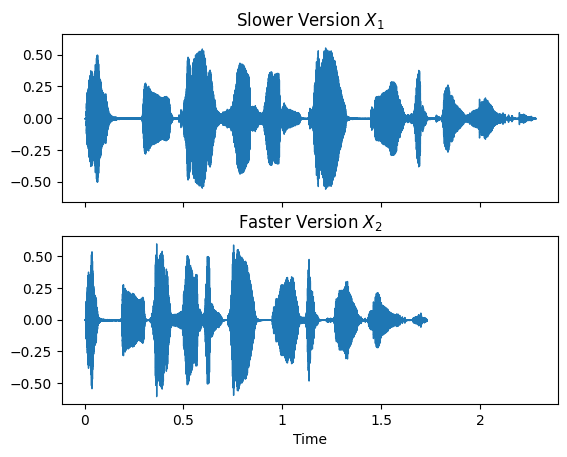

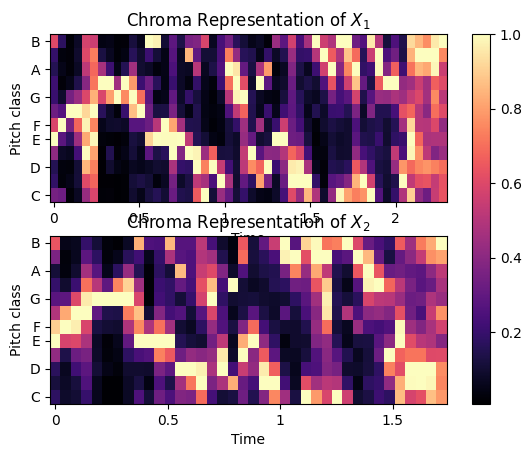

In [23]:
# Code source: Stefan Balke
# License: ISC
# sphinx_gallery_thumbnail_number = 4

from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display

# load audio files
x_1, fs = librosa.load('angry_ITH_new.wav')
x_2, fs = librosa.load('angry_ITH.wav')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(x_1, sr=fs, ax=ax[0])
ax[0].set(title='Slower Version $X_1$')
ax[0].label_outer()

librosa.display.waveshow(x_2, sr=fs, ax=ax[1])
ax[1].set(title='Faster Version $X_2$')

# get chromas

hop_length = 1024

x_1_chroma = librosa.feature.chroma_cqt(y=x_1, sr=fs,
                                         hop_length=hop_length)
x_2_chroma = librosa.feature.chroma_cqt(y=x_2, sr=fs,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=2, sharey=True)
img = librosa.display.specshow(x_1_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax[0])
ax[0].set(title='Chroma Representation of $X_1$')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma',
                         hop_length=hop_length, ax=ax[1])
ax[1].set(title='Chroma Representation of $X_2$')
fig.colorbar(img, ax=ax)



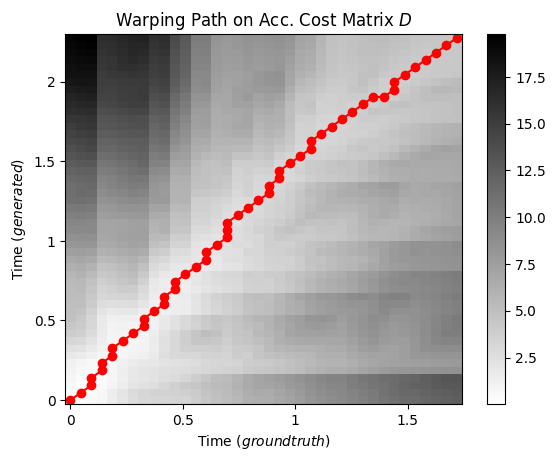

In [24]:
# plot DTW

D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=fs, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=fs,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(ground truth)$', ylabel='Time $(generated)$')
fig.colorbar(img, ax=ax)

In [25]:
# get frame disturbance value
import math
import numpy as np

SSE = sum((wp_s[:, 1] - wp_s[:, 0])**2)
FD = math.sqrt((1/len(wp_s))*SSE)
print(FD)

0.4032839282262143


In [28]:
#plot dtw in time scale

from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

# Plot x_2
librosa.display.waveshow(x_2, sr=fs, ax=ax2)
ax2.set(title='Ground Truth Waveform')

# Plot x_1
librosa.display.waveshow(x_1, sr=fs, ax=ax1)
ax1.set(title='Generated Phrase Waveform')
ax1.label_outer()


n_arrows = 20
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    # Create a connection patch between the aligned time points
    # in each subplot
    con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                          axesA=ax1, axesB=ax2,
                          coordsA='data', coordsB='data',
                          color='r', linestyle='--',
                          alpha=0.5)
    con.set_in_layout(False)  # This is needed to preserve layout
    ax2.add_artist(con)